In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The hypothesis:

1. Traffic will increase as the years pass by
2. Traffic will be high from May to October
3. Traffic on weekdays will be more
4. Traffic during the peak hours will be high

In [2]:
test = pd.read_csv('Test_0qrQsBZ.csv')
train = pd.read_csv('Train_SU63ISt.csv')
sub = pd.read_csv('Sample_Submission_QChS6c3.csv')

In [3]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [4]:
test.shape

(5112, 2)

In [5]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
train.shape

(18288, 3)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [8]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test['Datetime'],format = '%d-%m-%Y %H:%M')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.7 KB


In [10]:
for i in (train,test):
    i['Year'] = i.Datetime.dt.year
    i['Month'] = i.Datetime.dt.month
    i['Day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour
    i['Minute'] = i.Datetime.dt.minute
    i['Day of the week'] = i.Datetime.dt.dayofweek

In [11]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Minute,Day of the week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,0,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,0,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,0,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,0,5


In [35]:
train['Count'].unique(), train['Count'].nunique()

(array([   8,    2,    6,    4,   10,   14,   36,   12,   20,   16,   30,
          58,   18,   24,   28,   32,   22,   38,   26,   46,   34,   40,
          68,   52,   84,   56,   44,   50,   80,  200,  188,  140,   98,
          76,  116,   64,   42,   66,   74,   48,   54,   60,   62,   72,
          78,  136,   94,   82,  126,  104,  110,   86,   92,   88,  106,
          90,   70,   96,  100,  146,  122,  118,  102,  108,  128,  174,
         112,  134,  114,  156,  396,  160,  148,  138,  142,  176,  150,
         158,  152,  124,  120,  286,  216,  166,  194,  132,  130,  162,
         170,  144,  182,  180,  226,  172,  206,  208,  154,  184,  222,
         224,  228,  230,  178,  164,  168,  196,  220,  186,  202,  232,
         212,  598,  732,  288,  250,  192,  198,  218,  252,  258,  242,
         234,  204,  190,  266,  356,  338,  282,  236,  296,  244,  210,
         458,  342,  254,  328,  326,  264,  248,  324,  330,  260,  272,
         214,  308,  298,  300,  238, 

In [12]:
Day_Binary = []
for a in train['Day of the week']:  #assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend
    if a == 5 or a == 6:
        Day_Binary.append(1)
    else:
        Day_Binary.append(0)

In [13]:
type(Day_Binary)

list

In [14]:
train['Day_Binary'] = Day_Binary

In [15]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Minute,Day of the week,Day_Binary
0,0,2012-08-25 00:00:00,8,2012,8,25,0,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,0,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,0,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,0,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,0,5,1


In [16]:
train.set_index('Datetime',inplace=True)

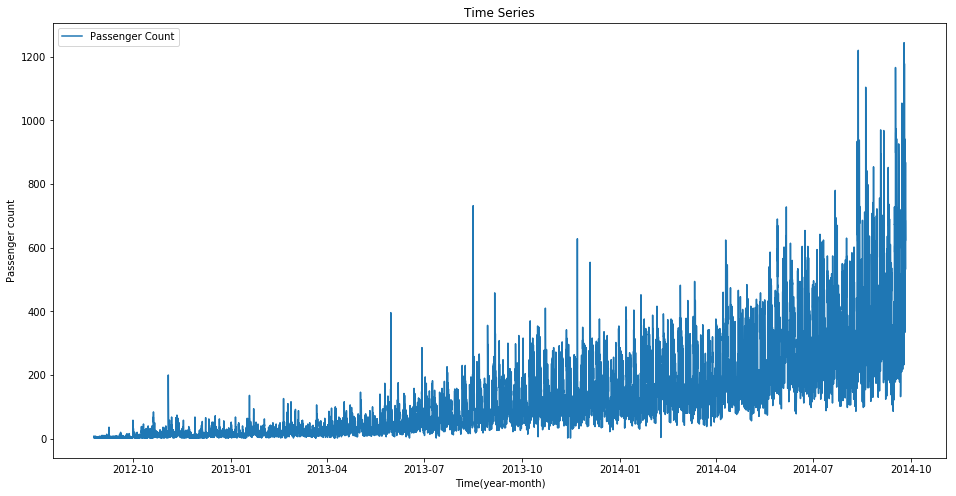

In [17]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

# EDA

Let's see our 1st hypothesis : Traffic will increase as the years pass by

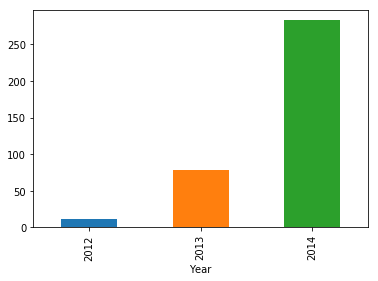

In [32]:
train.groupby('Year')['Count'].mean().plot('bar')

Our 2nd Hyp : Traffic will be high from May to October

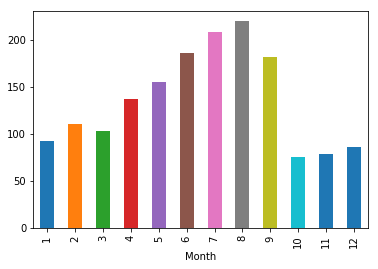

In [33]:
train.groupby('Month')['Count'].mean().plot('bar')

There is a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

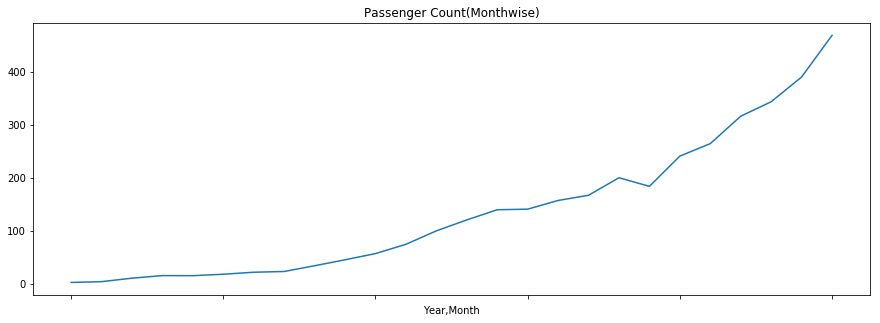

In [44]:
a = train.groupby(['Year', 'Month'])['Count'].mean()
a.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)')

Hyp 3: Traffic on weekdays will be more

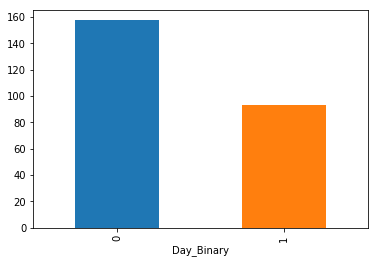

In [36]:
train.groupby('Day_Binary')['Count'].mean().plot('bar')

Hyp 4 : Traffic during the peak hours will be high

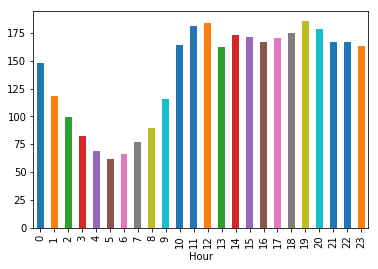

In [37]:
train.groupby('Hour')['Count'].mean().plot('bar')

In [47]:
train=train.drop('ID',1)

Train Test Split

In [49]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


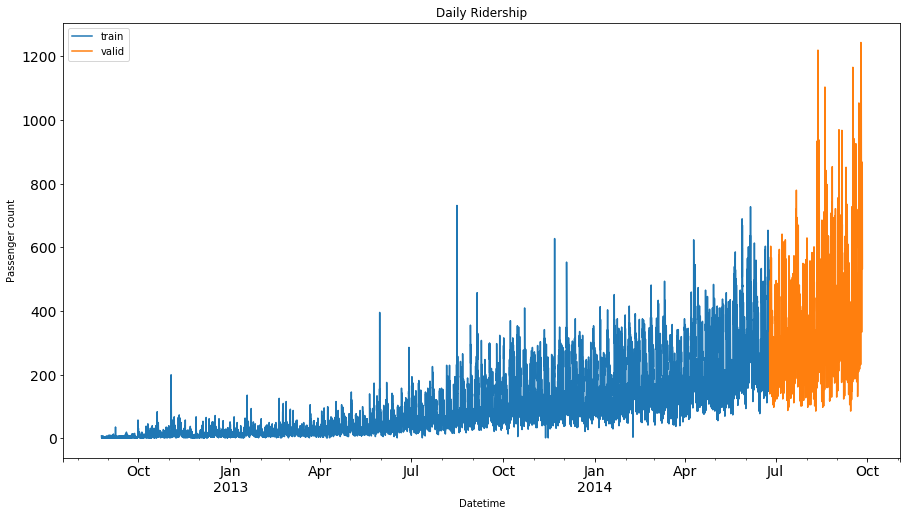

In [50]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()